In [2]:
!pip install -q google-generativeai

In [3]:
pip install datasets

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [4]:
import datasets
gsm8k = datasets.load_dataset('gsm8k','main')


In [5]:
print(len(gsm8k['test']))

1319


In [6]:
import pandas as pd
# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(gsm8k['test'])

# Export the DataFrame to a CSV file
df.to_csv('gsm8k_test1.csv', index=False)

print("CSV file exported successfully.")

CSV file exported successfully.


In test set we have total 1319 tets examples of question as well as their detailed answer.But due to the limitation of compuatation power we will randomly sample only 200 examples for our model evaluation

In [7]:
import pandas as pd
import random

# Read the original CSV file into a pandas DataFrame
df = pd.read_csv('gsm8k_test1.csv')


df_selected = df.head(200)

# Write the selected rows to a new CSV file named 'gsm8k_test.csv'
df_selected.to_csv('gsm8k_test.csv', index=False)

print("Randomly selected 200 rows written to 'gsm8k_test.csv' successfully.")

Randomly selected 200 rows written to 'gsm8k_test.csv' successfully.


In [19]:
import pandas as pd
df=pd.read_csv('gsm8k_test.csv')
print(df.shape)
df.head()

(200, 2)


,question,answer
0,Janet’s ducks lay 16 eggs per day. She eats th...,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...
1,A robe takes 2 bolts of blue fiber and half th...,It takes 2/2=<<2/2=1>>1 bolt of white fiber\nS...
2,Josh decides to try flipping a house. He buys...,The cost of the house and repairs came out to ...
3,James decides to run 3 sprints 3 times a week....,He sprints 3*3=<<3*3=9>>9 times\nSo he runs 9*...
4,"Every day, Wendi feeds each of her chickens th...","If each chicken eats 3 cups of feed per day, t..."


In [9]:
import google.generativeai as palm

In [10]:
palm.configure(api_key="Your_Own_API_Key")# Replace "Your_Own_API_Key" with your own API key , can be generated at https://ai.google.dev/tutorials/setup

In [11]:
models=[m for m in palm.list_models() if "generateText" in m.supported_generation_methods]

for m in models:
    print(f"Model Name: {m.name}")

Model Name: models/text-bison-001


In [12]:
model=models[0].name
model

'models/text-bison-001'

 # Let's start to experiment with our GSM8K data set

## 8-Shot Example with CoT prompt

In [14]:
import pandas as pd



# Open the text file in write mode
with open('evaluation_PaLM_8shot_CoT.txt', 'w',encoding="utf-8") as file:
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        question = row['question']
        answer = row['answer']
        prompt=f'''
        After looking at the following 8 questions and their detailed answers  , write a solution with step-by-step explanation for the 9th question:
        Question1: "There are 15 trees in the grove. Grove workers will plant trees in the grove today. After they are done, there will be 21 trees. How many trees did the grove workers plant today?"
        Answer: "There are 15 trees originally. Then there were 21 trees after some more were planted. So there must have been 21 - 15 = 6. The answer is 6."
        Question2: "If there are 3 cars in the parking lot and 2 more cars arrive, how many cars are in the parking lot?"
        Answer: "There are originally 3 cars. 2 more cars arrive. 3 + 2 = 5. The answer is 5."
        Question3: "Leah had 32 chocolates and her sister had 42. If they ate 35, how many pieces do they have left in total?"
        Answer: "Originally, Leah had 32 chocolates. Her sister had 42. So in total they had 32 + 42 = 74. After eating 35, they had 74 - 35 = 39. The answer is 39."
        Question4: "Jason had 20 lollipops. He gave Denny some lollipops. Now Jason has 12 lollipops. How many lollipops did Jason give to Denny?"
        Answer: "Jason started with 20 lollipops. Then he had 12 after giving some to Denny. So he gave Denny 20 - 12 = 8. The answer is 8."
        Question5: "Shawn has five toys. For Christmas, he got two toys each from his mom and dad. How many toys does he have now?"
        Answer: "Shawn started with 5 toys. If he got 2 toys each from his mom and dad, then that is 4 more toys. 5 + 4 = 9.The answer is 9."
        Question6: "There were nine computers in the server room. Five more computers were installed each day, from monday to thursday. How many computers are now in the server room?"
        Answer: "There were originally 9 computers. For each of 4 days, 5 more computers were added. So 5 * 4 = 20 computers were added. 9 + 20 is 29. The answer is 29."
        Question7: "Michael had 58 golf balls. On tuesday, he lost 23 golf balls. On wednesday, he lost 2 more. How many golf balls did he have at the end of wednesday?"
        Answer: "Michael started with 58 golf balls. After losing 23 on tuesday, he had 58 - 23 = 35. After losing 2 more, he had 35 - 2 = 33 golf balls. The answer is 33."
        Question8: "Olivia has $23. She bought five bagels for $3 each. How much money does she have left?"
        Answer: "Olivia had 23 dollars. 5 bagels for 3 dollars each will be 5 x 3 = 15 dollars. So she has 23 - 15 dollars left. 23- 15 is 8. The answer is 8."
        Question9: {question}
        '''
        completion=palm.generate_text(model=model,prompt=prompt,temperature=0.5,max_output_tokens=1024)
        model_answer=completion.result
        # Write the question and the new answer to the text file
        file.write(f"QUESTION: {question}\n***********************************\nANSWER: {answer}\n**********************************\nMODEL's_ANSWER: {model_answer}\n##############################################################################################\n")






print("Text file 'evaluation_PaLM_8shot_CoT.txt' created successfully.")

Text file 'evaluation_PaLM_8shot_CoT.txt' created successfully.


## 7 Shot Example of CoT prompt

In [15]:
# Open the text file in write mode
with open('evaluation_PaLM_7shot_CoT.txt', 'w',encoding="utf-8") as file:
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        question = row['question']
        answer = row['answer']
        prompt=f'''
        After looking at the following 7 questions and their detailed answers, write a solution with step-by-step explanation for the 8th question:
        Question1: "There are 15 trees in the grove. Grove workers will plant trees in the grove today. After they are done, there will be 21 trees. How many trees did the grove workers plant today?"
        Answer: "There are 15 trees originally. Then there were 21 trees after some more were planted. So there must have been 21 - 15 = 6. The answer is 6."
        Question2: "If there are 3 cars in the parking lot and 2 more cars arrive, how many cars are in the parking lot?"
        Answer: "There are originally 3 cars. 2 more cars arrive. 3 + 2 = 5. The answer is 5."
        Question3: "Leah had 32 chocolates and her sister had 42. If they ate 35, how many pieces do they have left in total?"
        Answer: "Originally, Leah had 32 chocolates. Her sister had 42. So in total they had 32 + 42 = 74. After eating 35, they had 74 - 35 = 39. The answer is 39."
        Question4: "Jason had 20 lollipops. He gave Denny some lollipops. Now Jason has 12 lollipops. How many lollipops did Jason give to Denny?"
        Answer: "Jason started with 20 lollipops. Then he had 12 after giving some to Denny. So he gave Denny 20 - 12 = 8. The answer is 8."
        Question5: "Shawn has five toys. For Christmas, he got two toys each from his mom and dad. How many toys does he have now?"
        Answer: "Shawn started with 5 toys. If he got 2 toys each from his mom and dad, then that is 4 more toys. 5 + 4 = 9.The answer is 9."
        Question6: "There were nine computers in the server room. Five more computers were installed each day, from monday to thursday. How many computers are now in the server room?"
        Answer: "There were originally 9 computers. For each of 4 days, 5 more computers were added. So 5 * 4 = 20 computers were added. 9 + 20 is 29. The answer is 29."
        Question7: "Michael had 58 golf balls. On tuesday, he lost 23 golf balls. On wednesday, he lost 2 more. How many golf balls did he have at the end of wednesday?"
        Answer: "Michael started with 58 golf balls. After losing 23 on tuesday, he had 58 - 23 = 35. After losing 2 more, he had 35 - 2 = 33 golf balls. The answer is 33."

        Question8: {question}
        '''
        completion=palm.generate_text(model=model,prompt=prompt,temperature=0.5,max_output_tokens=1024)
        model_answer=completion.result
        # Write the question and the new answer to the text file
        file.write(f"QUESTION: {question}\n***********************************\nANSWER: {answer}\n**********************************\nMODEL's_ANSWER: {model_answer}\n##############################################################################################\n")






print("evaluation_PaLM_7shot_CoT.txt' created successfully.")

evaluation_PaLM_7shot_CoT.txt' created successfully.


## 6 Shot CoT Example

In [17]:
# Open the text file in write mode
with open('evaluation_PaLM_6shot_CoT.txt', 'w',encoding="utf-8") as file:
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        question = row['question']
        answer = row['answer']
        prompt=f'''
        After looking at the following 6 questions and their detailed answers  , write a solution with step-by-step explanation for the 7th question:
        Question1: "There are 15 trees in the grove. Grove workers will plant trees in the grove today. After they are done, there will be 21 trees. How many trees did the grove workers plant today?"
        Answer: "There are 15 trees originally. Then there were 21 trees after some more were planted. So there must have been 21 - 15 = 6. The answer is 6."
        Question2: "If there are 3 cars in the parking lot and 2 more cars arrive, how many cars are in the parking lot?"
        Answer: "There are originally 3 cars. 2 more cars arrive. 3 + 2 = 5. The answer is 5."
        Question3: "Leah had 32 chocolates and her sister had 42. If they ate 35, how many pieces do they have left in total?"
        Answer: "Originally, Leah had 32 chocolates. Her sister had 42. So in total they had 32 + 42 = 74. After eating 35, they had 74 - 35 = 39. The answer is 39."
        Question4: "Jason had 20 lollipops. He gave Denny some lollipops. Now Jason has 12 lollipops. How many lollipops did Jason give to Denny?"
        Answer: "Jason started with 20 lollipops. Then he had 12 after giving some to Denny. So he gave Denny 20 - 12 = 8. The answer is 8."
        Question5: "Shawn has five toys. For Christmas, he got two toys each from his mom and dad. How many toys does he have now?"
        Answer: "Shawn started with 5 toys. If he got 2 toys each from his mom and dad, then that is 4 more toys. 5 + 4 = 9.The answer is 9."
        Question6: "There were nine computers in the server room. Five more computers were installed each day, from monday to thursday. How many computers are now in the server room?"
        Answer: "There were originally 9 computers. For each of 4 days, 5 more computers were added. So 5 * 4 = 20 computers were added. 9 + 20 is 29. The answer is 29."

        Question7: {question}
        '''
        completion=palm.generate_text(model=model,prompt=prompt,temperature=0.5,max_output_tokens=1024)
        model_answer=completion.result
        # Write the question and the new answer to the text file
        file.write(f"QUESTION: {question}\n***********************************\nANSWER: {answer}\n**********************************\nMODEL's_ANSWER: {model_answer}\n##############################################################################################\n")






print("evaluation_PaLM_6shot_CoT.txt' created successfully.")

evaluation_PaLM_6shot_CoT.txt' created successfully.


## 5 shot CoT example

In [18]:
# Open the text file in write mode
with open('evaluation_PaLM_5shot_CoT.txt', 'w',encoding="utf-8") as file:
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        question = row['question']
        answer = row['answer']
        prompt=f'''
        After looking at the following 5 questions and their detailed answers  , write a solution with step-by-step explanation for the 6th question:
        Question1: "There are 15 trees in the grove. Grove workers will plant trees in the grove today. After they are done, there will be 21 trees. How many trees did the grove workers plant today?"
        Answer: "There are 15 trees originally. Then there were 21 trees after some more were planted. So there must have been 21 - 15 = 6. The answer is 6."
        Question2: "If there are 3 cars in the parking lot and 2 more cars arrive, how many cars are in the parking lot?"
        Answer: "There are originally 3 cars. 2 more cars arrive. 3 + 2 = 5. The answer is 5."
        Question3: "Leah had 32 chocolates and her sister had 42. If they ate 35, how many pieces do they have left in total?"
        Answer: "Originally, Leah had 32 chocolates. Her sister had 42. So in total they had 32 + 42 = 74. After eating 35, they had 74 - 35 = 39. The answer is 39."
        Question4: "Jason had 20 lollipops. He gave Denny some lollipops. Now Jason has 12 lollipops. How many lollipops did Jason give to Denny?"
        Answer: "Jason started with 20 lollipops. Then he had 12 after giving some to Denny. So he gave Denny 20 - 12 = 8. The answer is 8."
        Question5: "Shawn has five toys. For Christmas, he got two toys each from his mom and dad. How many toys does he have now?"
        Answer: "Shawn started with 5 toys. If he got 2 toys each from his mom and dad, then that is 4 more toys. 5 + 4 = 9.The answer is 9."
        Question6: {question}
        '''
        completion=palm.generate_text(model=model,prompt=prompt,temperature=0.5,max_output_tokens=1024)
        model_answer=completion.result
        # Write the question and the new answer to the text file
        file.write(f"QUESTION: {question}\n***********************************\nANSWER: {answer}\n**********************************\nMODEL's_ANSWER: {model_answer}\n##############################################################################################\n")






print("Text file 'evaluation_PaLM_5shot_CoT.txt' created successfully.")

Text file 'evaluation_PaLM_5shot_CoT.txt' created successfully.


## 4 shot CoT Example

In [19]:
# Open the text file in write mode
with open('evaluation_PaLM_4shot_CoT.txt', 'w',encoding="utf-8") as file:
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        question = row['question']
        answer = row['answer']
        prompt=f'''
        After looking at the following 4 questions and their detailed answers  , write a solution with step-by-step explanation for the 5th question:
        Question1: "There are 15 trees in the grove. Grove workers will plant trees in the grove today. After they are done, there will be 21 trees. How many trees did the grove workers plant today?"
        Answer: "There are 15 trees originally. Then there were 21 trees after some more were planted. So there must have been 21 - 15 = 6. The answer is 6."
        Question2: "If there are 3 cars in the parking lot and 2 more cars arrive, how many cars are in the parking lot?"
        Answer: "There are originally 3 cars. 2 more cars arrive. 3 + 2 = 5. The answer is 5."
        Question3: "Leah had 32 chocolates and her sister had 42. If they ate 35, how many pieces do they have left in total?"
        Answer: "Originally, Leah had 32 chocolates. Her sister had 42. So in total they had 32 + 42 = 74. After eating 35, they had 74 - 35 = 39. The answer is 39."
        Question4: "Jason had 20 lollipops. He gave Denny some lollipops. Now Jason has 12 lollipops. How many lollipops did Jason give to Denny?"
        Answer: "Jason started with 20 lollipops. Then he had 12 after giving some to Denny. So he gave Denny 20 - 12 = 8. The answer is 8."

        Question5: {question}
        '''
        completion=palm.generate_text(model=model,prompt=prompt,temperature=0.5,max_output_tokens=1024)
        model_answer=completion.result
        # Write the question and the new answer to the text file
        file.write(f"QUESTION: {question}\n***********************************\nANSWER: {answer}\n**********************************\nMODEL's_ANSWER: {model_answer}\n##############################################################################################\n")






print("Text file 'evaluation_PaLM_4shot_CoT.txt' created successfully.")

Text file 'evaluation_PaLM_4shot_CoT.txt' created successfully.


## 3 Shot CoT Example

In [20]:
# Open the text file in write mode
with open('evaluation_PaLM_3shot_CoT.txt', 'w',encoding="utf-8") as file:
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        question = row['question']
        answer = row['answer']
        prompt=f'''
        After looking at the following 3 questions and their detailed answers  , write a solution with step-by-step explanation for the 4th question:
        Question1: "There are 15 trees in the grove. Grove workers will plant trees in the grove today. After they are done, there will be 21 trees. How many trees did the grove workers plant today?"
        Answer: "There are 15 trees originally. Then there were 21 trees after some more were planted. So there must have been 21 - 15 = 6. The answer is 6."
        Question2: "If there are 3 cars in the parking lot and 2 more cars arrive, how many cars are in the parking lot?"
        Answer: "There are originally 3 cars. 2 more cars arrive. 3 + 2 = 5. The answer is 5."
        Question3: "Leah had 32 chocolates and her sister had 42. If they ate 35, how many pieces do they have left in total?"
        Answer: "Originally, Leah had 32 chocolates. Her sister had 42. So in total they had 32 + 42 = 74. After eating 35, they had 74 - 35 = 39. The answer is 39."


        Question4: {question}
        '''
        completion=palm.generate_text(model=model,prompt=prompt,temperature=0.5,max_output_tokens=1024)
        model_answer=completion.result
        # Write the question and the new answer to the text file
        file.write(f"QUESTION: {question}\n***********************************\nANSWER: {answer}\n**********************************\nMODEL's_ANSWER: {model_answer}\n##############################################################################################\n")






print("Text file 'evaluation_PaLM_3shot_CoT.txt' created successfully.")

Text file 'evaluation_PaLM_3shot_CoT.txt' created successfully.


## 2 Shot CoT Example

In [21]:
# Open the text file in write mode
with open('evaluation_PaLM_2shot_CoT.txt', 'w',encoding="utf-8") as file:
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        question = row['question']
        answer = row['answer']
        prompt=f'''
        After looking at the following 2 questions and their detailed answers  , write a solution with step-by-step explanation for the 3rd question:
        Question1: "There are 15 trees in the grove. Grove workers will plant trees in the grove today. After they are done, there will be 21 trees. How many trees did the grove workers plant today?"
        Answer: "There are 15 trees originally. Then there were 21 trees after some more were planted. So there must have been 21 - 15 = 6. The answer is 6."
        Question2: "If there are 3 cars in the parking lot and 2 more cars arrive, how many cars are in the parking lot?"
        Answer: "There are originally 3 cars. 2 more cars arrive. 3 + 2 = 5. The answer is 5."

        Question3: {question}
        '''
        completion=palm.generate_text(model=model,prompt=prompt,temperature=0.5,max_output_tokens=1024)
        model_answer=completion.result
        # Write the question and the new answer to the text file
        file.write(f"QUESTION: {question}\n***********************************\nANSWER: {answer}\n**********************************\nMODEL's_ANSWER: {model_answer}\n##############################################################################################\n")






print("Text file 'evaluation_PaLM_2shot_CoT.txt' created successfully.")

Text file 'evaluation_PaLM_2shot_CoT.txt' created successfully.


## 1 shot CoT Example

In [22]:
# Open the text file in write mode
with open('evaluation_PaLM_1shot_CoT.txt', 'w',encoding="utf-8") as file:
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        question = row['question']
        answer = row['answer']
        prompt=f'''
        After looking at the following 1 question and its detailed answer  , write a solution with step-by-step explanation for the 2nd question:
        Question1: "There are 15 trees in the grove. Grove workers will plant trees in the grove today. After they are done, there will be 21 trees. How many trees did the grove workers plant today?"
        Answer: "There are 15 trees originally. Then there were 21 trees after some more were planted. So there must have been 21 - 15 = 6. The answer is 6."


        Question2: {question}
        '''
        completion=palm.generate_text(model=model,prompt=prompt,temperature=0.5,max_output_tokens=1024)
        model_answer=completion.result
        # Write the question and the new answer to the text file
        file.write(f"QUESTION: {question}\n***********************************\nANSWER: {answer}\n**********************************\nMODEL's_ANSWER: {model_answer}\n##############################################################################################\n")






print("Text file 'evaluation_PaLM_1shot_CoT.txt' created successfully.")

Text file 'evaluation_PaLM_1shot_CoT.txt' created successfully.


# O shot CoT Example

In [23]:
# Open the text file in write mode
with open('evaluation_PaLM_0shot_CoT.txt', 'w',encoding="utf-8") as file:
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        question = row['question']
        answer = row['answer']
        prompt=f'''
        Provide a solution of the following question with step-by-step explanation:


        Question: {question}
        '''
        completion=palm.generate_text(model=model,prompt=prompt,temperature=0.5,max_output_tokens=1024)
        model_answer=completion.result
        # Write the question and the new answer to the text file
        file.write(f"QUESTION: {question}\n***********************************\nANSWER: {answer}\n**********************************\nMODEL's_ANSWER: {model_answer}\n##############################################################################################\n")






print("Text file 'evaluation_PaLM_0shot_CoT.txt' created successfully.")

Text file 'evaluation_PaLM_0shot_CoT.txt' created successfully.


## 8 shot standard prompt example

In [24]:
import pandas as pd



# Open the text file in write mode
with open('evaluation_PaLM_8shot_standardPrompt.txt', 'w',encoding="utf-8") as file:
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        question = row['question']
        answer = row['answer']
        prompt=f'''
        After looking at the following 8 questions and their answers  , solve the 9th question:
        Question1: "There are 15 trees in the grove. Grove workers will plant trees in the grove today. After they are done, there will be 21 trees. How many trees did the grove workers plant today?"
        Answer: "The answer is 6."
        Question2: "If there are 3 cars in the parking lot and 2 more cars arrive, how many cars are in the parking lot?"
        Answer: "The answer is 5."
        Question3: "Leah had 32 chocolates and her sister had 42. If they ate 35, how many pieces do they have left in total?"
        Answer: "The answer is 39."
        Question4: "Jason had 20 lollipops. He gave Denny some lollipops. Now Jason has 12 lollipops. How many lollipops did Jason give to Denny?"
        Answer: "The answer is 8."
        Question5: "Shawn has five toys. For Christmas, he got two toys each from his mom and dad. How many toys does he have now?"
        Answer: "The answer is 9."
        Question6: "There were nine computers in the server room. Five more computers were installed each day, from monday to thursday. How many computers are now in the server room?"
        Answer: "The answer is 29."
        Question7: "Michael had 58 golf balls. On tuesday, he lost 23 golf balls. On wednesday, he lost 2 more. How many golf balls did he have at the end of wednesday?"
        Answer: "The answer is 33."
        Question8: "Olivia has $23. She bought five bagels for $3 each. How much money does she have left?"
        Answer: "The answer is 8."
        Question9: {question}
        '''
        completion=palm.generate_text(model=model,prompt=prompt,temperature=0.5,max_output_tokens=1024)
        model_answer=completion.result
        # Write the question and the new answer to the text file
        file.write(f"QUESTION: {question}\n***********************************\nANSWER: {answer}\n**********************************\nMODEL's_ANSWER: {model_answer}\n##############################################################################################\n")






print("Text file 'evaluation_PaLM_8shot_standardPrompt.txt' created successfully.")

Text file 'evaluation_PaLM_8shot_standardPrompt.txt' created successfully.


## 7 shot Standard Prompt Example

In [25]:
import pandas as pd



# Open the text file in write mode
with open('evaluation_PaLM_7shot_standardPrompt.txt', 'w',encoding="utf-8") as file:
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        question = row['question']
        answer = row['answer']
        prompt=f'''
        After looking at the following 7 questions and their answers  , solve the 8th question:
        Question1: "There are 15 trees in the grove. Grove workers will plant trees in the grove today. After they are done, there will be 21 trees. How many trees did the grove workers plant today?"
        Answer: "The answer is 6."
        Question2: "If there are 3 cars in the parking lot and 2 more cars arrive, how many cars are in the parking lot?"
        Answer: "The answer is 5."
        Question3: "Leah had 32 chocolates and her sister had 42. If they ate 35, how many pieces do they have left in total?"
        Answer: "The answer is 39."
        Question4: "Jason had 20 lollipops. He gave Denny some lollipops. Now Jason has 12 lollipops. How many lollipops did Jason give to Denny?"
        Answer: "The answer is 8."
        Question5: "Shawn has five toys. For Christmas, he got two toys each from his mom and dad. How many toys does he have now?"
        Answer: "The answer is 9."
        Question6: "There were nine computers in the server room. Five more computers were installed each day, from monday to thursday. How many computers are now in the server room?"
        Answer: "The answer is 29."
        Question7: "Michael had 58 golf balls. On tuesday, he lost 23 golf balls. On wednesday, he lost 2 more. How many golf balls did he have at the end of wednesday?"
        Answer: "The answer is 33."
        Question8: {question}
        '''
        completion=palm.generate_text(model=model,prompt=prompt,temperature=0.5,max_output_tokens=1024)
        model_answer=completion.result
        # Write the question and the new answer to the text file
        file.write(f"QUESTION: {question}\n***********************************\nANSWER: {answer}\n**********************************\nMODEL's_ANSWER: {model_answer}\n##############################################################################################\n")






print("Text file 'evaluation_PaLM_7shot_standardPrompt.txt' created successfully.")

Text file 'evaluation_PaLM_7shot_standardPrompt.txt' created successfully.


## 6 shot Standard Prompt Example

In [26]:
import pandas as pd



# Open the text file in write mode
with open('evaluation_PaLM_6shot_standardPrompt.txt', 'w',encoding="utf-8") as file:
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        question = row['question']
        answer = row['answer']
        prompt=f'''
        After looking at the following 6 questions and their answers  , solve the 7th question:
        Question1: "There are 15 trees in the grove. Grove workers will plant trees in the grove today. After they are done, there will be 21 trees. How many trees did the grove workers plant today?"
        Answer: "The answer is 6."
        Question2: "If there are 3 cars in the parking lot and 2 more cars arrive, how many cars are in the parking lot?"
        Answer: "The answer is 5."
        Question3: "Leah had 32 chocolates and her sister had 42. If they ate 35, how many pieces do they have left in total?"
        Answer: "The answer is 39."
        Question4: "Jason had 20 lollipops. He gave Denny some lollipops. Now Jason has 12 lollipops. How many lollipops did Jason give to Denny?"
        Answer: "The answer is 8."
        Question5: "Shawn has five toys. For Christmas, he got two toys each from his mom and dad. How many toys does he have now?"
        Answer: "The answer is 9."
        Question6: "There were nine computers in the server room. Five more computers were installed each day, from monday to thursday. How many computers are now in the server room?"
        Answer: "The answer is 29."

        Question7: {question}
        '''
        completion=palm.generate_text(model=model,prompt=prompt,temperature=0.5,max_output_tokens=1024)
        model_answer=completion.result
        # Write the question and the new answer to the text file
        file.write(f"QUESTION: {question}\n***********************************\nANSWER: {answer}\n**********************************\nMODEL's_ANSWER: {model_answer}\n##############################################################################################\n")






print("Text file 'evaluation_PaLM_6shot_standardPrompt.txt' created successfully.")

Text file 'evaluation_PaLM_6shot_standardPrompt.txt' created successfully.


## 5 shot standard prompt example

In [28]:
import pandas as pd



# Open the text file in write mode
with open('evaluation_PaLM_5shot_standardPrompt.txt', 'w',encoding="utf-8") as file:
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        question = row['question']
        answer = row['answer']
        prompt=f'''
        After looking at the following 5 questions and their answers  , solve the 6th question:
        Question1: "There are 15 trees in the grove. Grove workers will plant trees in the grove today. After they are done, there will be 21 trees. How many trees did the grove workers plant today?"
        Answer: "The answer is 6."
        Question2: "If there are 3 cars in the parking lot and 2 more cars arrive, how many cars are in the parking lot?"
        Answer: "The answer is 5."
        Question3: "Leah had 32 chocolates and her sister had 42. If they ate 35, how many pieces do they have left in total?"
        Answer: "The answer is 39."
        Question4: "Jason had 20 lollipops. He gave Denny some lollipops. Now Jason has 12 lollipops. How many lollipops did Jason give to Denny?"
        Answer: "The answer is 8."
        Question5: "Shawn has five toys. For Christmas, he got two toys each from his mom and dad. How many toys does he have now?"
        Answer: "The answer is 9."

        Question6: {question}
        '''
        completion=palm.generate_text(model=model,prompt=prompt,temperature=0.5,max_output_tokens=1024)
        model_answer=completion.result
        # Write the question and the new answer to the text file
        file.write(f"QUESTION: {question}\n***********************************\nANSWER: {answer}\n**********************************\nMODEL's_ANSWER: {model_answer}\n##############################################################################################\n")






print("Text file 'evaluation_PaLM_5shot_standardPrompt.txt' created successfully.")

Text file 'evaluation_PaLM_5shot_standardPrompt.txt' created successfully.


## 4 shot standard prompt example

In [29]:
import pandas as pd



# Open the text file in write mode
with open('evaluation_PaLM_4shot_standardPrompt.txt', 'w',encoding="utf-8") as file:
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        question = row['question']
        answer = row['answer']
        prompt=f'''
        After looking at the following 4 questions and their answers  , solve the 5th question:
        Question1: "There are 15 trees in the grove. Grove workers will plant trees in the grove today. After they are done, there will be 21 trees. How many trees did the grove workers plant today?"
        Answer: "The answer is 6."
        Question2: "If there are 3 cars in the parking lot and 2 more cars arrive, how many cars are in the parking lot?"
        Answer: "The answer is 5."
        Question3: "Leah had 32 chocolates and her sister had 42. If they ate 35, how many pieces do they have left in total?"
        Answer: "The answer is 39."
        Question4: "Jason had 20 lollipops. He gave Denny some lollipops. Now Jason has 12 lollipops. How many lollipops did Jason give to Denny?"
        Answer: "The answer is 8."

        Question5: {question}
        '''
        completion=palm.generate_text(model=model,prompt=prompt,temperature=0.5,max_output_tokens=1024)
        model_answer=completion.result
        # Write the question and the new answer to the text file
        file.write(f"QUESTION: {question}\n***********************************\nANSWER: {answer}\n**********************************\nMODEL's_ANSWER: {model_answer}\n##############################################################################################\n")






print("Text file 'evaluation_PaLM_4shot_standardPrompt.txt' created successfully.")

Text file 'evaluation_PaLM_4shot_standardPrompt.txt' created successfully.


## 3 shot standard prompt example

In [30]:
import pandas as pd



# Open the text file in write mode
with open('evaluation_PaLM_3shot_standardPrompt.txt', 'w',encoding="utf-8") as file:
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        question = row['question']
        answer = row['answer']
        prompt=f'''
        After looking at the following 3 questions and their answers  , solve the 4th question:
        Question1: "There are 15 trees in the grove. Grove workers will plant trees in the grove today. After they are done, there will be 21 trees. How many trees did the grove workers plant today?"
        Answer: "The answer is 6."
        Question2: "If there are 3 cars in the parking lot and 2 more cars arrive, how many cars are in the parking lot?"
        Answer: "The answer is 5."
        Question3: "Leah had 32 chocolates and her sister had 42. If they ate 35, how many pieces do they have left in total?"
        Answer: "The answer is 39."

        Question4: {question}
        '''
        completion=palm.generate_text(model=model,prompt=prompt,temperature=0.5,max_output_tokens=1024)
        model_answer=completion.result
        # Write the question and the new answer to the text file
        file.write(f"QUESTION: {question}\n***********************************\nANSWER: {answer}\n**********************************\nMODEL's_ANSWER: {model_answer}\n##############################################################################################\n")






print("Text file 'evaluation_PaLM_3shot_standardPrompt.txt' created successfully.")

Text file 'evaluation_PaLM_3shot_standardPrompt.txt' created successfully.


## 2 shot standard prompt example

In [31]:
import pandas as pd



# Open the text file in write mode
with open('evaluation_PaLM_2shot_standardPrompt.txt', 'w',encoding="utf-8") as file:
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        question = row['question']
        answer = row['answer']
        prompt=f'''
        After looking at the following 2 questions and their answers  , solve the 3rd question:
        Question1: "There are 15 trees in the grove. Grove workers will plant trees in the grove today. After they are done, there will be 21 trees. How many trees did the grove workers plant today?"
        Answer: "The answer is 6."
        Question2: "If there are 3 cars in the parking lot and 2 more cars arrive, how many cars are in the parking lot?"
        Answer: "The answer is 5."

        Question3: {question}
        '''
        completion=palm.generate_text(model=model,prompt=prompt,temperature=0.5,max_output_tokens=1024)
        model_answer=completion.result
        # Write the question and the new answer to the text file
        file.write(f"QUESTION: {question}\n***********************************\nANSWER: {answer}\n**********************************\nMODEL's_ANSWER: {model_answer}\n##############################################################################################\n")






print("Text file 'evaluation_PaLM_2shot_standardPrompt.txt' created successfully.")

Text file 'evaluation_PaLM_2shot_standardPrompt.txt' created successfully.


## 1 shot standard prompt

In [22]:
import pandas as pd



# Open the text file in write mode
with open('evaluation_PaLM_1shot_standardPrompt.txt', 'w',encoding="utf-8") as file:
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        question = row['question']
        answer = row['answer']
        prompt=f'''
        After looking at the following 1 question and its answer  , solve the 2nd question:
        Question1: "There are 15 trees in the grove. Grove workers will plant trees in the grove today. After they are done, there will be 21 trees. How many trees did the grove workers plant today?"
        Answer: "The answer is 6."


        Question2: {question}
        '''
        completion=palm.generate_text(model=model,prompt=prompt,temperature=0.5,max_output_tokens=1024)
        model_answer=completion.result
        # Write the question and the new answer to the text file
        file.write(f"QUESTION: {question}\n***********************************\nANSWER: {answer}\n**********************************\nMODEL's_ANSWER: {model_answer}\n##############################################################################################\n")






print("Text file 'evaluation_PaLM_1shot_standardPrompt.txt' created successfully.")

Text file 'evaluation_PaLM_1shot_standardPrompt.txt' created successfully.


## Zero shot standard prompt

In [23]:
import pandas as pd



# Open the text file in write mode
with open('evaluation_PaLM_0shot_standardPrompt.txt', 'w',encoding="utf-8") as file:
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        question = row['question']
        answer = row['answer']
        prompt=f'''
        Solve the following question:



        Question1: {question}
        '''
        completion=palm.generate_text(model=model,prompt=prompt,temperature=0.5,max_output_tokens=1024)
        model_answer=completion.result
        # Write the question and the new answer to the text file
        file.write(f"QUESTION: {question}\n***********************************\nANSWER: {answer}\n**********************************\nMODEL's_ANSWER: {model_answer}\n##############################################################################################\n")






print("Text file 'evaluation_PaLM_0shot_standardPrompt.txt' created successfully.")

Text file 'evaluation_PaLM_0shot_standardPrompt.txt' created successfully.


Let's count the number of answers matching with the modedl's answers in standard prompt. For CoT prompt we will check it manually becuase there we will not only check the final answers but also whether the CoT reasoning is corrrect or not.

In [24]:
import re

def extract_numerical_value(sentence):
    # Regular expression pattern to match numerical values
    pattern = r'\b\d+\b'

    # Find all numerical values in the sentence using regex
    numerical_values = re.findall(pattern, sentence)

    # If numerical values are found, return the first one
    if numerical_values:
        return int(numerical_values[0])  # Assuming you want integers
    else:
        return None  # Return None if no numerical value is found

In [19]:
import numpy as np
# Open the text file
with open('evaluation_PaLM_8shot_standardPrompt.txt', 'r') as file:
    lines = file.readlines()

# Initialize count for same numerical values
same_count = 0

# Initialize variables to store numerical values
Value1 = []
Value2 = []

# Loop through each line in the file
for line in lines:
    # Check if the line starts with '####' and extract the numerical value
    if line.startswith('####')and not line.startswith("##############################################################################################"):
        #print(line)
        value1 = float((line.split()[-1]).replace(',',''))
        Value1.append(value1)
    # Check if the line contains 'MODEL's_ANSWER' and extract the numerical value
    elif "MODEL's_ANSWER" in line:
        # Extract numerical value from the line, handling different formats
        value2=extract_numerical_value(line)
        Value2.append(value2)
Value1=np.array(Value1)
Value2=np.array(Value2)
same_count = np.count_nonzero(Value1 == Value2)
print(f"Model gave the correct answers with 8shot standard prompts : {same_count} number of times.")

Model gave the correct answers with 8shot standard prompts : 37 number of times.


In [20]:
import numpy as np
# Open the text file
with open('evaluation_PaLM_7shot_standardPrompt.txt', 'r') as file:
    lines = file.readlines()

# Initialize count for same numerical values
same_count = 0

# Initialize variables to store numerical values
Value1 = []
Value2 = []

# Loop through each line in the file
for line in lines:
    # Check if the line starts with '####' and extract the numerical value
    if line.startswith('####')and not line.startswith("##############################################################################################"):
        #print(line)
        value1 = float((line.split()[-1]).replace(',',''))
        Value1.append(value1)
    # Check if the line contains 'MODEL's_ANSWER' and extract the numerical value
    elif "MODEL's_ANSWER" in line:
        # Extract numerical value from the line, handling different formats
        value2=extract_numerical_value(line)
        Value2.append(value2)
Value1=np.array(Value1)
Value2=np.array(Value2)
same_count = np.count_nonzero(Value1 == Value2)
print(f"Model gave the correct answers with 7shot standard prompts : {same_count} number of times.")

Model gave the correct answers with 7shot standard prompts : 37 number of times.


In [21]:
import numpy as np
# Open the text file
with open('evaluation_PaLM_6shot_standardPrompt.txt', 'r') as file:
    lines = file.readlines()

# Initialize count for same numerical values
same_count = 0

# Initialize variables to store numerical values
Value1 = []
Value2 = []

# Loop through each line in the file
for line in lines:
    # Check if the line starts with '####' and extract the numerical value
    if line.startswith('####')and not line.startswith("##############################################################################################"):
        #print(line)
        value1 = float((line.split()[-1]).replace(',',''))
        Value1.append(value1)
    # Check if the line contains 'MODEL's_ANSWER' and extract the numerical value
    elif "MODEL's_ANSWER" in line:
        # Extract numerical value from the line, handling different formats
        value2=extract_numerical_value(line)
        Value2.append(value2)
Value1=np.array(Value1)
Value2=np.array(Value2)
same_count = np.count_nonzero(Value1 == Value2)
print(f"Model gave the correct answers with 6shot standard prompts : {same_count} number of times.")

Model gave the correct answers with 6shot standard prompts : 35 number of times.


In [22]:
import numpy as np
# Open the text file
with open('evaluation_PaLM_5shot_standardPrompt.txt', 'r') as file:
    lines = file.readlines()

# Initialize count for same numerical values
same_count = 0

# Initialize variables to store numerical values
Value1 = []
Value2 = []

# Loop through each line in the file
for line in lines:
    # Check if the line starts with '####' and extract the numerical value
    if line.startswith('####')and not line.startswith("##############################################################################################"):
        #print(line)
        value1 = float((line.split()[-1]).replace(',',''))
        Value1.append(value1)
    # Check if the line contains 'MODEL's_ANSWER' and extract the numerical value
    elif "MODEL's_ANSWER" in line:
        # Extract numerical value from the line, handling different formats
        value2=extract_numerical_value(line)
        Value2.append(value2)
Value1=np.array(Value1)
Value2=np.array(Value2)
same_count = np.count_nonzero(Value1 == Value2)
print(f"Model gave the correct answers with 5shot standard prompts : {same_count} number of times.")

Model gave the correct answers with 5shot standard prompts : 32 number of times.


In [23]:
import numpy as np
# Open the text file
with open('evaluation_PaLM_4shot_standardPrompt.txt', 'r') as file:
    lines = file.readlines()

# Initialize count for same numerical values
same_count = 0

# Initialize variables to store numerical values
Value1 = []
Value2 = []

# Loop through each line in the file
for line in lines:
    # Check if the line starts with '####' and extract the numerical value
    if line.startswith('####')and not line.startswith("##############################################################################################"):
        #print(line)
        value1 = float((line.split()[-1]).replace(',',''))
        Value1.append(value1)
    # Check if the line contains 'MODEL's_ANSWER' and extract the numerical value
    elif "MODEL's_ANSWER" in line:
        # Extract numerical value from the line, handling different formats
        value2=extract_numerical_value(line)
        Value2.append(value2)
Value1=np.array(Value1)
Value2=np.array(Value2)
same_count = np.count_nonzero(Value1 == Value2)
print(f"Model gave the correct answers with 4shot standard prompts : {same_count} number of times.")

Model gave the correct answers with 4shot standard prompts : 33 number of times.


In [24]:
import numpy as np
# Open the text file
with open('evaluation_PaLM_3shot_standardPrompt.txt', 'r') as file:
    lines = file.readlines()

# Initialize count for same numerical values
same_count = 0

# Initialize variables to store numerical values
Value1 = []
Value2 = []

# Loop through each line in the file
for line in lines:
    # Check if the line starts with '####' and extract the numerical value
    if line.startswith('####')and not line.startswith("##############################################################################################"):
        #print(line)
        value1 = float((line.split()[-1]).replace(',',''))
        Value1.append(value1)
    # Check if the line contains 'MODEL's_ANSWER' and extract the numerical value
    elif "MODEL's_ANSWER" in line:
        # Extract numerical value from the line, handling different formats
        value2=extract_numerical_value(line)
        Value2.append(value2)
Value1=np.array(Value1)
Value2=np.array(Value2)
same_count = np.count_nonzero(Value1 == Value2)
print(f"Model gave the correct answers with 3shot standard prompts : {same_count} number of times.")

Model gave the correct answers with 3shot standard prompts : 35 number of times.


In [25]:
import numpy as np
# Open the text file
with open('evaluation_PaLM_2shot_standardPrompt.txt', 'r') as file:
    lines = file.readlines()

# Initialize count for same numerical values
same_count = 0

# Initialize variables to store numerical values
Value1 = []
Value2 = []

# Loop through each line in the file
for line in lines:
    # Check if the line starts with '####' and extract the numerical value
    if line.startswith('####')and not line.startswith("##############################################################################################"):
        #print(line)
        value1 = float((line.split()[-1]).replace(',',''))
        Value1.append(value1)
    # Check if the line contains 'MODEL's_ANSWER' and extract the numerical value
    elif "MODEL's_ANSWER" in line:
        # Extract numerical value from the line, handling different formats
        value2=extract_numerical_value(line)
        Value2.append(value2)
Value1=np.array(Value1)
Value2=np.array(Value2)
same_count = np.count_nonzero(Value1 == Value2)
print(f"Model gave the correct answers with 2shot standard prompts : {same_count} number of times.")

Model gave the correct answers with 2shot standard prompts : 28 number of times.


In [25]:
import numpy as np
# Open the text file
with open('evaluation_PaLM_1shot_standardPrompt.txt', 'r') as file:
    lines = file.readlines()

# Initialize count for same numerical values
same_count = 0

# Initialize variables to store numerical values
Value1 = []
Value2 = []

# Loop through each line in the file
for line in lines:
    # Check if the line starts with '####' and extract the numerical value
    if line.startswith('####')and not line.startswith("##############################################################################################"):
        #print(line)
        value1 = float((line.split()[-1]).replace(',',''))
        Value1.append(value1)
    # Check if the line contains 'MODEL's_ANSWER' and extract the numerical value
    elif "MODEL's_ANSWER" in line:
        # Extract numerical value from the line, handling different formats
        value2=extract_numerical_value(line)
        Value2.append(value2)
Value1=np.array(Value1)
Value2=np.array(Value2)
same_count = np.count_nonzero(Value1 == Value2)
print(f"Model gave the correct answers with 1shot standard prompts : {same_count} number of times.")

Model gave the correct answers with 1shot standard prompts : 26 number of times.


In [26]:
import numpy as np
# Open the text file
with open('evaluation_PaLM_0shot_standardPrompt.txt', 'r') as file:
    lines = file.readlines()

# Initialize count for same numerical values
same_count = 0

# Initialize variables to store numerical values
Value1 = []
Value2 = []

# Loop through each line in the file
for line in lines:
    # Check if the line starts with '####' and extract the numerical value
    if line.startswith('####')and not line.startswith("##############################################################################################"):
        #print(line)
        value1 = float((line.split()[-1]).replace(',',''))
        Value1.append(value1)
    # Check if the line contains 'MODEL's_ANSWER' and extract the numerical value
    elif "MODEL's_ANSWER" in line:
        # Extract numerical value from the line, handling different formats
        value2=extract_numerical_value(line)
        Value2.append(value2)
Value1=np.array(Value1)
Value2=np.array(Value2)
same_count = np.count_nonzero(Value1 == Value2)
print(f"Model gave the correct answers with 0shot standard prompts : {same_count} number of times.")

Model gave the correct answers with 0shot standard prompts : 24 number of times.


Analyzing Performance 

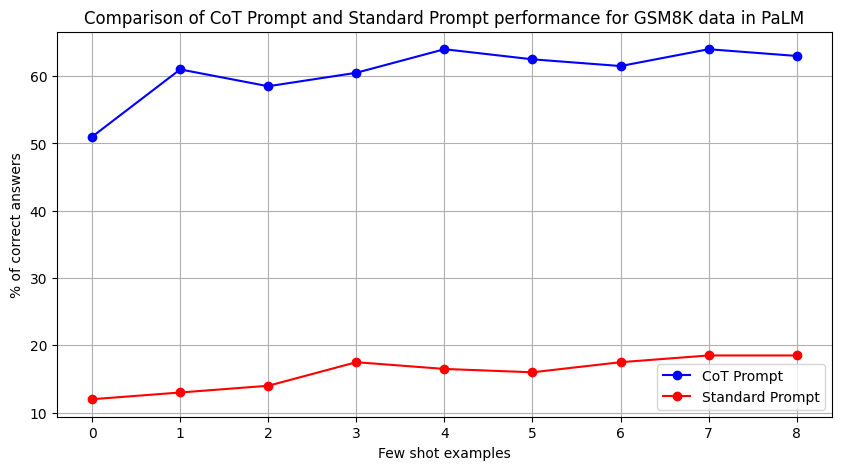

In [31]:
import matplotlib.pyplot as plt

import numpy as np
# Data
shot_num = [0, 1, 2, 3, 4,5,6,7,8]
standard_prom = [24,26,28,35,33,32,35,37,37]
CoT_prom= [102,122,117,121,128,125,123,128,126]
CoT_prom=list((100/200)*np.array(CoT_prom))
standard_prom=list((100/200)*np.array(standard_prom))


# Plot
plt.figure(figsize=(10, 5))

plt.plot(shot_num, CoT_prom, marker='o', label='CoT Prompt', color='blue')
plt.plot(shot_num, standard_prom, marker='o', label='Standard Prompt', color='red')

plt.title('Comparison of CoT Prompt and Standard Prompt performance for GSM8K data in PaLM')
plt.xlabel('Few shot examples')
plt.ylabel('% of correct answers')
plt.xticks(shot_num)  # Set x-axis ticks to match shot numbers
plt.grid(True)
plt.legend()

# Save the plot as image1.png
plt.savefig('GSM8K.png')

# Show the plot
plt.show()